In [2]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies

     |████████████████████████████████| 706kB 7.9MB/s 


In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

import keras 
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense 

from keras.layers import Dropout

from keras.layers import LSTM

from keras.layers import *


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

from tcn import TCN, tcn_full_summary


In [4]:
df=pd.read_csv("TESLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)
training_set = df.iloc[:800, 4:5].values

test_set = df.iloc[800:, 4:5].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Number of rows and columns: (1259, 7)


DATA WINDOW 60

In [5]:

X_train60 = []
y_train60 = []
for i in range(60, 800):
    X_train60.append(training_set_scaled[i-60:i, 0])
    y_train60.append(training_set_scaled[i, 0])
X_train60, y_train60 = np.array(X_train60), np.array(y_train60)
X_train60 = np.reshape(X_train60, (X_train60.shape[0], X_train60.shape[1], 1))

X_train60.shape

(740, 60, 1)

TEST DATA WINDOW 60

In [6]:

dataset_train = df.iloc[:800, 4:5]
dataset_test = df.iloc[800:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)


519

In [7]:
X_test60 = []
for i in range(60, 519):
    X_test60.append(inputs[i-60:i, 0])
X_test60 = np.array(X_test60)
X_test60 = np.reshape(X_test60, (X_test60.shape[0], X_test60.shape[1], 1))
X_test60.shape

(459, 60, 1)

DATA WINDOW 1

In [8]:

X_train1 = []
y_train1 = []
for i in range(1, 800):
    X_train1.append(training_set_scaled[i-1:i, 0])
    y_train1.append(training_set_scaled[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
X_train1.shape

(799, 1, 1)

TEST DATA WINDOW 1

In [9]:

dataset_train = df.iloc[:800, 4:5]
dataset_test = df.iloc[800:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

460

In [10]:

X_test1 = []
for i in range(1, 460):
    X_test1.append(inputs[i-1:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
print(X_test1.shape)

(459, 1, 1)


DATA WINDOW 30

In [11]:


X_train30 = []
y_train30 = []
for i in range(30, 800):
    X_train30.append(training_set_scaled[i-30:i, 0])
    y_train30.append(training_set_scaled[i, 0])
X_train30, y_train30 = np.array(X_train30), np.array(y_train30)
X_train30 = np.reshape(X_train30, (X_train30.shape[0], X_train30.shape[1], 1))
X_train30.shape

(770, 30, 1)

TEST DATA WINDOW 30

In [12]:

dataset_train = df.iloc[:800, 4:5]
dataset_test = df.iloc[800:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

489

In [13]:

X_test30 = []
for i in range(30, 489):
    X_test30.append(inputs[i-30:i, 0])
X_test30 = np.array(X_test30)
X_test30 = np.reshape(X_test30, (X_test30.shape[0], X_test30.shape[1], 1))
print(X_test30.shape)

(459, 30, 1)


DATA WINDOW 90

In [14]:

X_train90 = []
y_train90 = []
for i in range(90, 800):
    X_train90.append(training_set_scaled[i-90:i, 0])
    y_train90.append(training_set_scaled[i, 0])
X_train90, y_train90 = np.array(X_train90), np.array(y_train90)
X_train90 = np.reshape(X_train90, (X_train90.shape[0], X_train90.shape[1], 1))
X_train90.shape

(710, 90, 1)

TEST DATA WINDOW 90

In [15]:

dataset_train = df.iloc[:800, 4:5]
dataset_test = df.iloc[800:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

549

In [16]:

X_test90 = []
for i in range(90, 549):
    X_test90.append(inputs[i-90:i, 0])
X_test90 = np.array(X_test90)
X_test90 = np.reshape(X_test90, (X_test90.shape[0], X_test90.shape[1], 1))
print(X_test90.shape)

(459, 90, 1)


TCN 1

In [17]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train1.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 18s 13ms/step - loss: 0.3300
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 4/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0126
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0070
Epoch 8/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 9/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 10/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 11/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 12/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 13/100
25/25 [=========

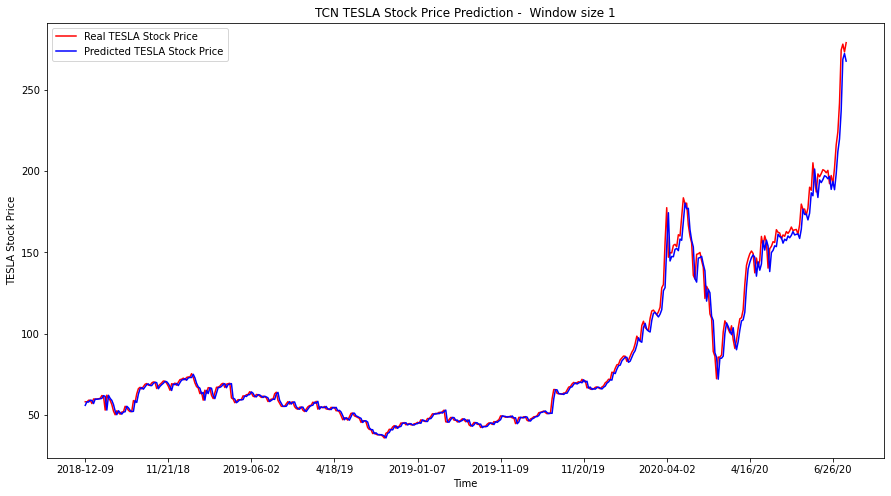

In [19]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(459,) 
x = df.loc[800: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('TCN TESLA Stock Price Prediction -  Window size 1')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 

In [20]:
abse = mean_absolute_error(predicted_stock_price, y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

2.908531871537884 5.373139907835685


GRU 1

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train1.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 30, batch_size = 32)

Epoch 1/30
25/25 [==============================] - 3s 3ms/step - loss: 0.1557
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0235
Epoch 3/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 5/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 8/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 9/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 10/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 11/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 12/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 13/30
25/25 [==============================

In [ ]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(459, 1)

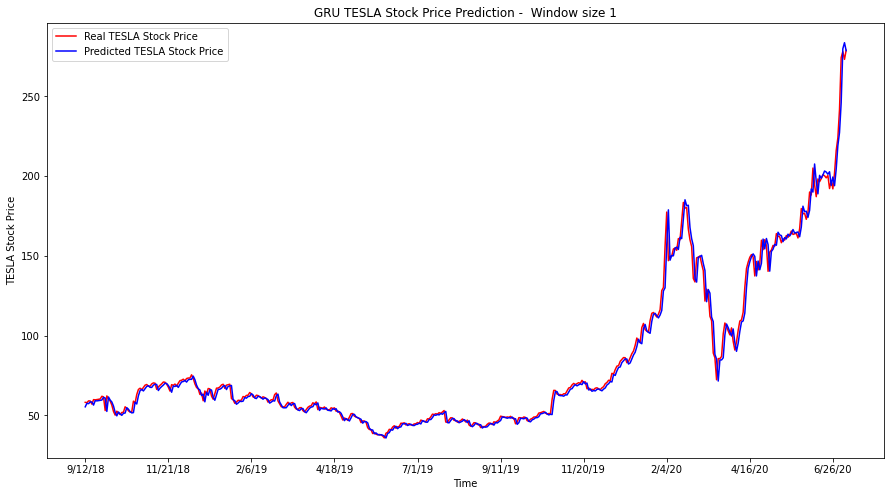

In [ ]:
y =  dataset_test.values.reshape(459,) 
x = df.loc[800: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('GRU TESLA Stock Price Prediction -  Window size 1')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

2.8239373625573383 4.9860301344453735


TCN 30

In [21]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train30.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train30, y_train30, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 3s 13ms/step - loss: 21.3376
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.5904
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.2308
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.1727
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.1365
Epoch 6/100
25/25 [==============================] - 0s 10ms/step - loss: 0.1229
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 0.1176
Epoch 8/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0787
Epoch 9/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0943
Epoch 10/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0754
Epoch 11/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0579
Epoch 12/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0543
Epoch 13/100
25/25 [==========

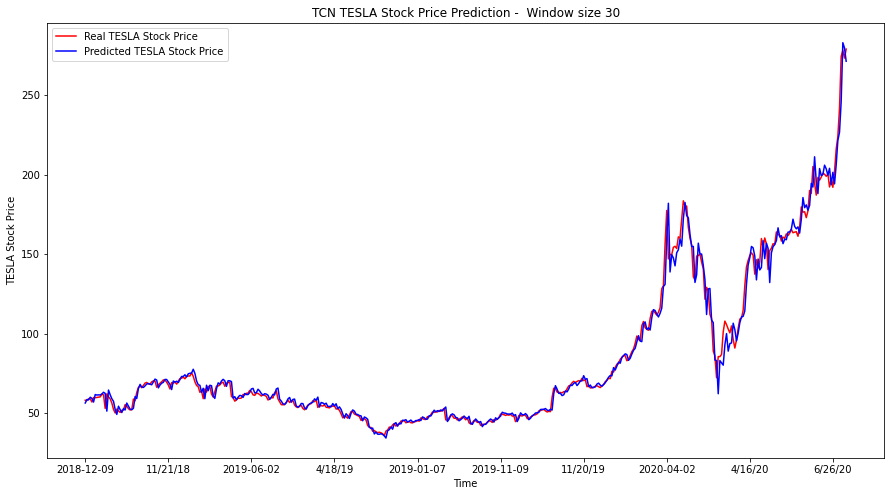

In [22]:
predicted_stock_price = model.predict(X_test30)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(459,) 
x = df.loc[800: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('TCN TESLA Stock Price Prediction -  Window size 30')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 

In [23]:
abse = mean_absolute_error(predicted_stock_price, y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

3.0991794699116633 5.417463662774459


GRU 30

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train30.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train30, y_train30, epochs = 30, batch_size = 32)

Epoch 1/30
25/25 [==============================] - 2s 10ms/step - loss: 0.0855
Epoch 2/30
25/25 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 3/30
25/25 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 4/30
25/25 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 5/30
25/25 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 6/30
25/25 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 7/30
25/25 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 8/30
25/25 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 9/30
25/25 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 10/30
25/25 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 11/30
25/25 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 12/30
25/25 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 13/30
25/25 [=============================

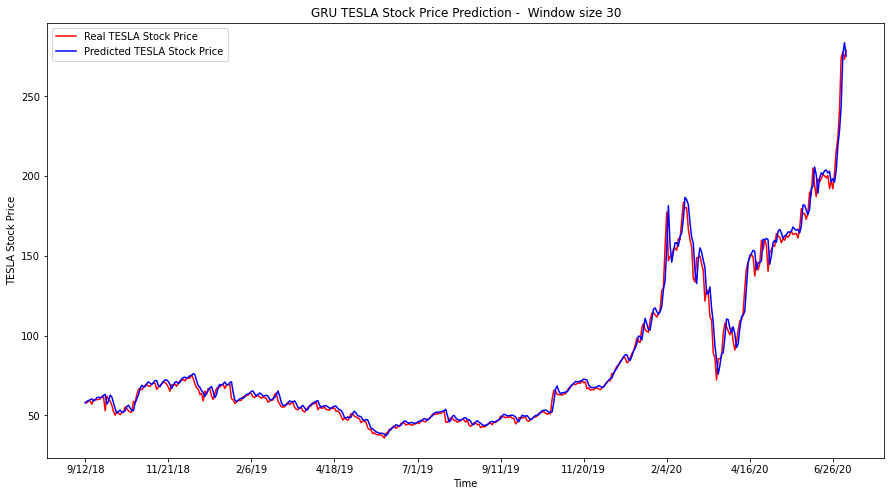

In [ ]:
predicted_stock_price = model.predict(X_test30)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(459,) 
x = df.loc[800: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('GRU TESLA Stock Price Prediction -  Window size 30')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

3.081715274711925 5.188341389493299


TCN 60

In [24]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train60.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train60, y_train60, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 3s 12ms/step - loss: 27.9218
Epoch 2/100
24/24 [==============================] - 0s 9ms/step - loss: 1.0922
Epoch 3/100
24/24 [==============================] - 0s 10ms/step - loss: 0.4799
Epoch 4/100
24/24 [==============================] - 0s 10ms/step - loss: 0.4230
Epoch 5/100
24/24 [==============================] - 0s 10ms/step - loss: 0.3760
Epoch 6/100
24/24 [==============================] - 0s 12ms/step - loss: 0.3184
Epoch 7/100
24/24 [==============================] - 0s 9ms/step - loss: 0.2140
Epoch 8/100
24/24 [==============================] - 0s 9ms/step - loss: 0.2107
Epoch 9/100
24/24 [==============================] - 0s 10ms/step - loss: 0.1747
Epoch 10/100
24/24 [==============================] - 0s 10ms/step - loss: 0.1310
Epoch 11/100
24/24 [==============================] - 0s 9ms/step - loss: 0.1241
Epoch 12/100
24/24 [==============================] - 0s 9ms/step - loss: 0.1022
Epoch 13/100
24/24 [=========

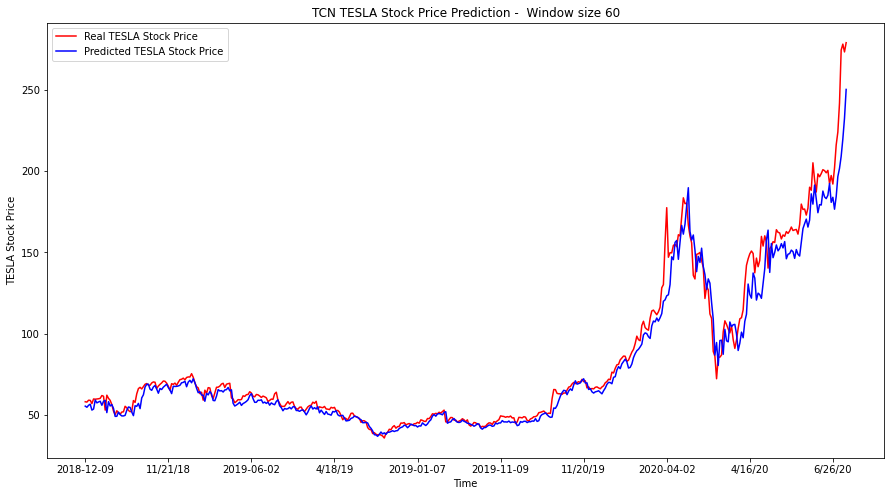

In [25]:
predicted_stock_price = model.predict(X_test60)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(459,) 
x = df.loc[800: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('TCN TESLA Stock Price Prediction -  Window size 60')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 

In [26]:
abse = mean_absolute_error(predicted_stock_price, y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

5.649166548336121 9.868843685585377


GRU 60

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train60.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train60, y_train60, epochs = 30, batch_size = 32)

Epoch 1/30
24/24 [==============================] - 1s 15ms/step - loss: 0.0689
Epoch 2/30
24/24 [==============================] - 0s 11ms/step - loss: 0.0037
Epoch 3/30
24/24 [==============================] - 0s 11ms/step - loss: 0.0022
Epoch 4/30
24/24 [==============================] - 0s 11ms/step - loss: 0.0018
Epoch 5/30
24/24 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 6/30
24/24 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 7/30
24/24 [==============================] - 0s 11ms/step - loss: 0.0013
Epoch 8/30
24/24 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 9/30
24/24 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 10/30
24/24 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 11/30
24/24 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 12/30
24/24 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 13/30
24/24 [==================

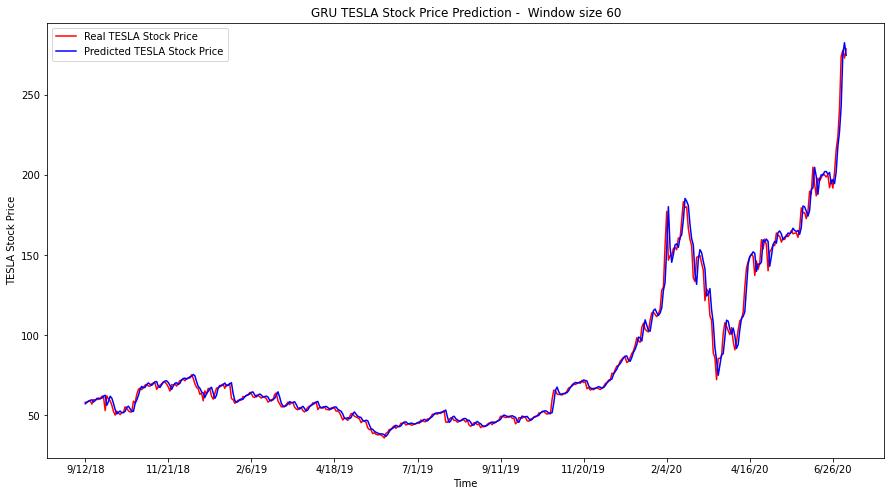

In [ ]:
predicted_stock_price = model.predict(X_test60)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(459,) 
x = df.loc[800: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('GRU TESLA Stock Price Prediction -  Window size 60')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

2.8497013410107317 5.051724729882174


GRU 90

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train90.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 30, batch_size = 32)

Epoch 1/30
23/23 [==============================] - 2s 19ms/step - loss: 0.0801
Epoch 2/30
23/23 [==============================] - 0s 15ms/step - loss: 0.0037
Epoch 3/30
23/23 [==============================] - 0s 15ms/step - loss: 0.0018
Epoch 4/30
23/23 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 5/30
23/23 [==============================] - 0s 15ms/step - loss: 0.0021
Epoch 6/30
23/23 [==============================] - 0s 15ms/step - loss: 0.0016
Epoch 7/30
23/23 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 8/30
23/23 [==============================] - 0s 15ms/step - loss: 0.0018
Epoch 9/30
23/23 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 10/30
23/23 [==============================] - 0s 15ms/step - loss: 0.0017
Epoch 11/30
23/23 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 12/30
23/23 [==============================] - 0s 15ms/step - loss: 0.0022
Epoch 13/30
23/23 [==================

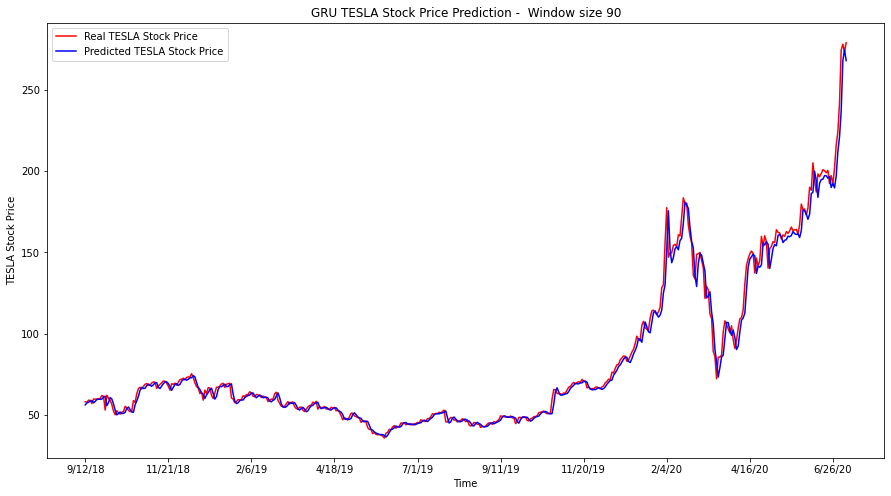

In [ ]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(459,) 
x = df.loc[800: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('GRU TESLA Stock Price Prediction -  Window size 90')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

3.0715394937565956 5.453173027833791


TCN 90

In [27]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=5, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train90.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 3s 13ms/step - loss: 57.7110
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 1.3027
Epoch 3/100
23/23 [==============================] - 0s 11ms/step - loss: 0.4575
Epoch 4/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2928
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2567
Epoch 6/100
23/23 [==============================] - 0s 11ms/step - loss: 0.1705
Epoch 7/100
23/23 [==============================] - 0s 11ms/step - loss: 0.1475
Epoch 8/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1531
Epoch 9/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1338
Epoch 10/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1110
Epoch 11/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0865
Epoch 12/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0977
Epoch 13/100
23/23 [=======

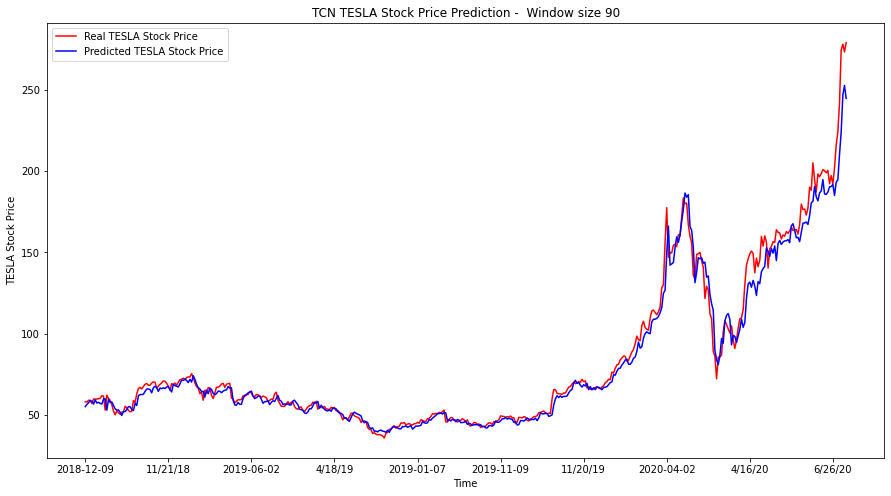

In [28]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(459,) 
x = df.loc[800: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('TCN TESLA Stock Price Prediction -  Window size 90')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 

In [29]:
abse = mean_absolute_error(predicted_stock_price, y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

4.272640106875617 7.2909591881241225
